# Impact Solution - Studentevent

### Välkomna!

Ikväll kommer ni att få testa på lite dataanalys med riktig försäljningsstatistik från våra automater. Ni arbetar tillsammans i grupp och sammanställer koden i denna notebook. Mot slutet av kvällen kommer ni få möjligheten att visa upp era resultat och en chans att vinna priser.

För att hjälpa er komma igång har ni färdig kod nedan som laddar in och visualiserar datan. Ni får även några exempelanalyser som ni kan ta inspiration från. Självklart kan ni också fråga någon av oss anställda om ni kör fast.

Lycka till!


## Casebeskrivning

Ni har alla fått varsitt gruppnamn, ert gruppnamn är kopplat till någon av våra placeringsgrupper, alltså en plats som en automat kan stå på. Indelningen vi har med idag är:

* Kontor
* Industri
* Skola
* Gym
* Padelhall

Utifrån er grupp kommer ni fritt få välja något att undersöka som kan landa i en rekommendation, alltså hur resultatet av er dataanalys kan tillämpas i praktiken. För att få igång era tankar kring vad ni vill undersöka kan ni ta hjälp av följande förslag:

\\

| Analysområde                 | Slutsats                                                                                       | Rekommendation                                                                                                                 |
|------------------------------|------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Trender över Tid             | Försäljningen av drycker ökar markant under sommarmånaderna.                                   | Öka lagerhållningen av drycker inför sommarmånaderna och utforska möjligheten att införa nya sommarrelaterade dryckesalternativ. |
| Produktprestanda             | Vissa snacksprodukter säljer mycket bättre än andra, oberoende av pris.                        | Prioritera dessa högpresterande snacksprodukter och överväg att fasa ut de med låg försäljning.                                |
| Placeringsgruppens Påverkan  | Maskiner placerade i gym har en högre försäljning av hälsosamma snacks och drycker.            | Anpassa produktutbudet i gym-placerade automater till att innehålla fler hälsosamma alternativ.                               |
| Försäljningsmönster          | Eftermiddagar är högtrafik för varuautomater i kontorsmiljöer.                                 | Erbjud tidsbegränsade erbjudanden eller rabatter under dessa tidpunkter.                                                      |
| Kundtyper | Återkommande kunder väljar ofta samma produkter | Använd riktade erbjudanden eller rabatter för att belöna lojalitet |
| Prissättningsstrategier      | Stark korrelation mellan lägre pris och högre försäljningsvolym för vissa produkter.           | Testa dynamisk prissättning för att hitta den optimala prisnivån.                                                             |
| Effektivitet av Produktpositionering | Produkter placerade på ögonhöjd säljer bättre.                                                | Placera de mest populära eller högmarginalprodukterna på ögonhöjd.                                                            |

\\
Om ni vill kan ni ta någon frågeställning rakt av men ni får självklart komma med helt egna.

\\

Koden nedan använder pandas för datahanteringen. Är ni helt nya till pandas finns en kort guide på https://pandas.pydata.org/docs/user_guide/10min.html . Ni kan också ta hjälp av valfri språkmodell för att generera kod.

\\
När ni börjar bli färdiga med er analys kan ni använda presentationsmallen för att göra er redo att visa upp resultaten.




## Beskrivning av data

Ni kommer få delar av försäljningsdatan från 2022 och 2023. Varje försäljningstillfälle innehåller följande information:

| DATA           | DESCRIPTION                                                             |
|----------------|-------------------------------------------------------------------------|
| **Product**    | Namn på produkten som såldes                                             |
| **Price**      | Priset som produkten såldes för                                         |
| **Time**       | Tid då produkten såldes (Year, Month, Day, Weekday, Hour, Minute)        |
| **Category**   | Kategori som produkten tillhör. T.ex. Mat, Dryck, Snacks                |
| **Position**   | Plats i automaten där produkten såldes                                  |
| **Machine Name**  | Namn på automaten där produkten såldes                                 |
| **Machine Group** | Kategori på maskinplacering. T.ex. Gym, School                         |
| **Customer ID** | ID som tilldelas varje unik kund                                        |
| **Products Sold Together** | Lista med produkter som köptes av samma kund inom ett intervall på fem minuter |



# Inläsning av data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_data = pd.read_parquet("Sales_Combined.parquet")

print(sales_data.columns)
print(sales_data['Machine Group'].unique())

Index(['Product', 'Price', 'Position', 'Machine Name', 'Machine ID',
       'Customer ID', 'Day', 'Month', 'Year', 'Hour', 'Minute', 'Weekday',
       'Category', 'Products Sold Together', 'Machine Group'],
      dtype='object')
['GYM' 'Office' 'SPORTS GROUNDS' 'SCHOOLS, UNIV' 'Industry']


### Visualisering av data

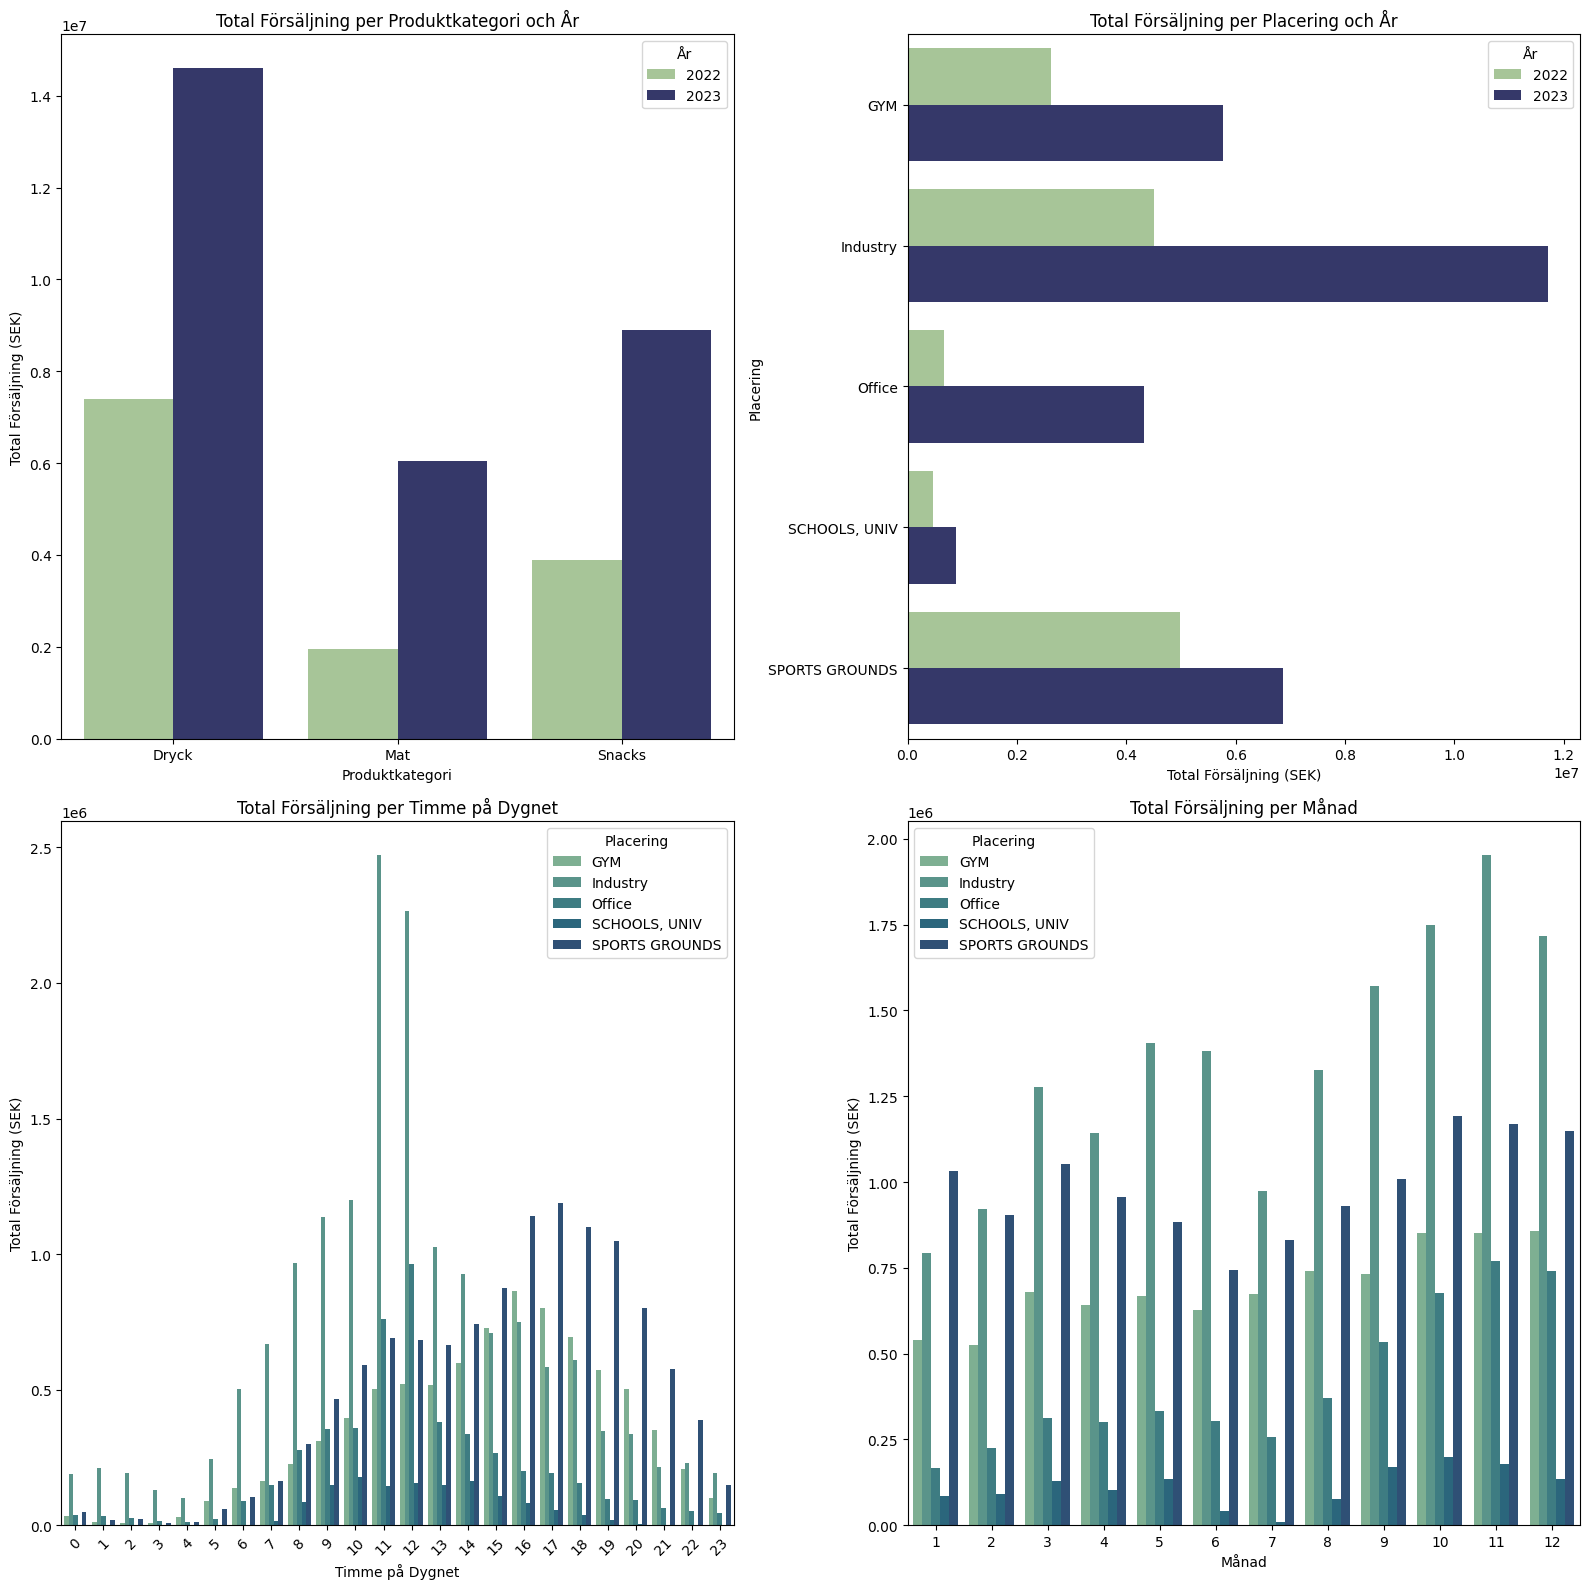

In [4]:
# Summera försäljningen per kategori och år
sales_per_category_year = sales_data.groupby(['Category', 'Year'])['Price'].sum().reset_index()

# Summera försäljningen per placering och år
sales_per_location_year = sales_data.groupby(['Machine Group', 'Year'])['Price'].sum().reset_index()

# Summera försäljningen per veckodag
sales_per_weekday = sales_data.groupby(['Weekday', 'Year'])['Price'].sum().reset_index()

# Summera försäljningen per timme på dygnet
sales_per_hour = sales_data.groupby(['Hour', 'Machine Group'])['Price'].sum().reset_index()

# Summera försäljningen per månad
sales_per_month = sales_data.groupby(['Month', 'Machine Group'])['Price'].sum().reset_index()



# Ange figurstorlek
plt.figure(figsize=(16, 16))

# Första subplot: Försäljning per kategori och år
plt.subplot(2, 2, 1) # 1 rad, 3 kolumner, första plot
sns.barplot(x='Category', y='Price', hue='Year', data=sales_per_category_year, palette='crest')
plt.xlabel('Produktkategori')
plt.ylabel('Total Försäljning (SEK)')
plt.title('Total Försäljning per Produktkategori och År')
plt.legend(title='År')

# Andra subplot: Försäljning per placering och år
plt.subplot(2, 2, 2) # 1 rad, 3 kolumner, andra plot
sns.barplot(x='Price', y='Machine Group', hue='Year', data=sales_per_location_year, palette='crest')
plt.xlabel('Total Försäljning (SEK)')
plt.ylabel('Placering')
plt.title('Total Försäljning per Placering och År')
plt.legend(title='År')

# Tredje subplot: Försäljning per timme på dygnet
plt.subplot(2, 2, 3) # 1 rad, 3 kolumner, tredje plot
sns.barplot(x='Hour', y='Price', hue='Machine Group', data=sales_per_hour, palette='crest')
plt.xticks(rotation=45)
plt.xlabel('Timme på Dygnet')
plt.ylabel('Total Försäljning (SEK)')
plt.title('Total Försäljning per Timme på Dygnet')
plt.legend(title='Placering')

# Fjärde subplot: Försäljning per månad
plt.subplot(2, 2, 4) # 1 rad, 4 kolumner, fjärde plot
sns.barplot(x='Month', y='Price', hue='Machine Group', data=sales_per_month, palette='crest')
plt.xlabel('Månad')
plt.ylabel('Total Försäljning (SEK)')
plt.title('Total Försäljning per Månad')
plt.legend(title='Placering')

plt.tight_layout() # Justerar subplot för att förhindra överlappning
plt.show()

### Exempelanalys 1 - Trendande produkter Kontor

                              2022    2023  Percent Change
Product                                                   
Pepsi Max 50cl               147.0  2642.0     1697.278912
Mer Hallon Svartvinbär 50cl  132.0  1809.0     1270.454545
Wasa Sandwich French Herbs    86.0  1115.0     1196.511628
Risifrutti Jordgubb          140.0  1660.0     1085.714286
Gooh! Matlåda                100.0  1175.0     1075.000000
                                  nov    dec  Percent Change
Product                                                     
Kalmar Matlåda                  103.0  913.0      786.407767
Wasa Sandwich Sour Cream Onion   18.0   93.0      416.666667
Nocco Skumnisse 33cl             33.0  125.0      278.787879
Apotekarnes Julmust 33cl Light   14.0   41.0      192.857143
Celsius Arctic Vibe              19.0   52.0      173.684211


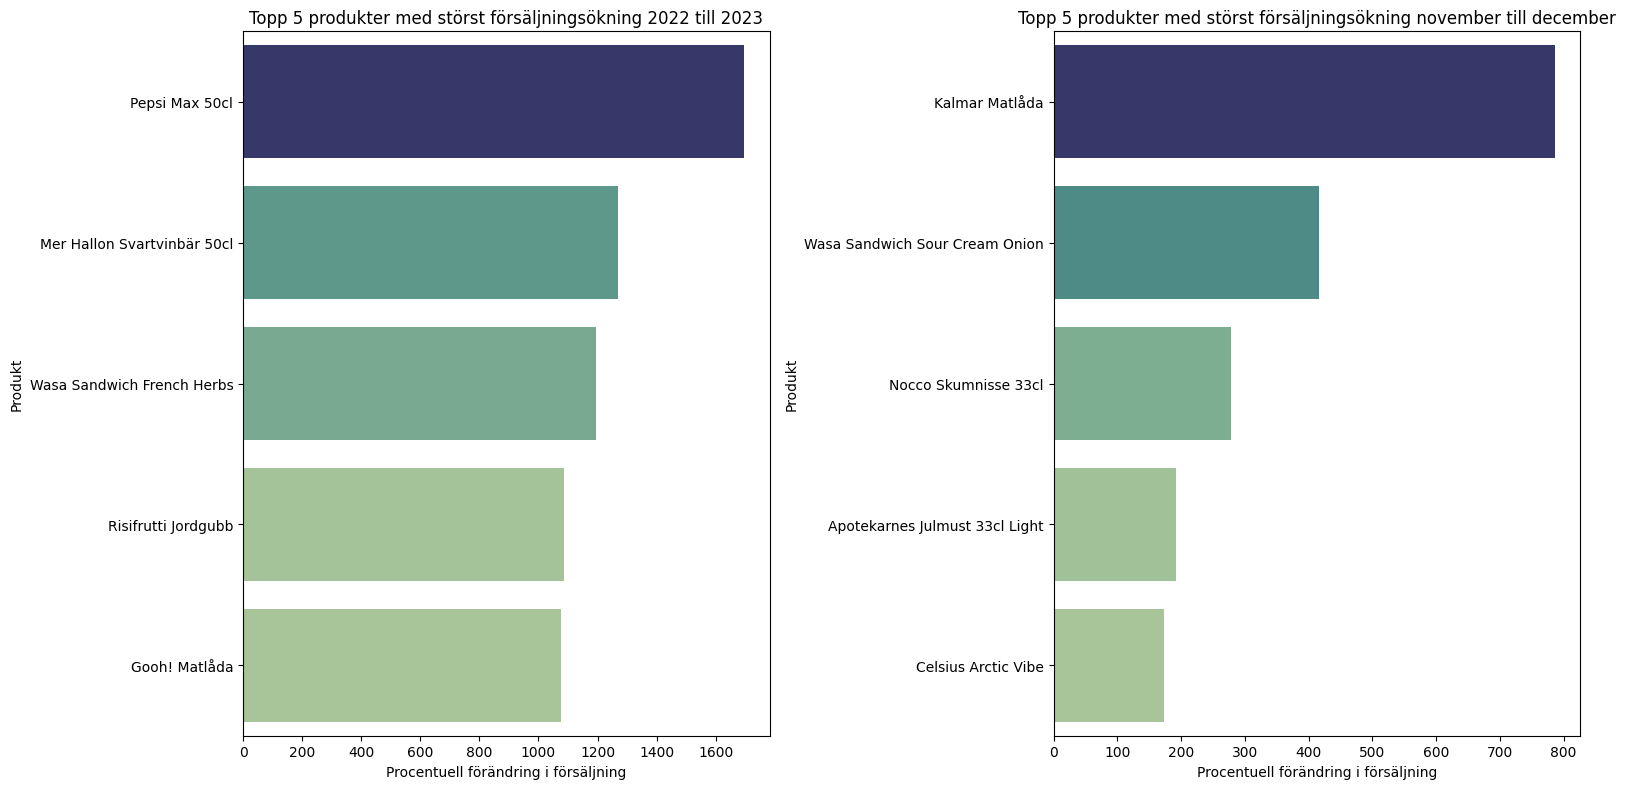

In [5]:
# Analysera vilka produkter som ökat mest i försäljning från 2022 till 2023 i placeringsgrupperna "Kontor" och "Industri"

treshold = 75 # Gräns för att sortera bort nya produkter

# Dela upp df_combined i två delar, en för Kontor
df_office = sales_data[sales_data['Machine Group'] == 'Office']

# Räkna antal försäljningstillfällen för varje produkt under 2022 och 2023
product_counts_office_2022 = df_office[df_office['Year'] == 2022]['Product'].value_counts()
product_counts_office_2023 = df_office[df_office['Year'] == 2023]['Product'].value_counts()

# Skapa DataFrames för att jämföra försäljning av produkter mellan 2022 och 2023 för Kontor
office_comparison = pd.DataFrame({
    '2022': product_counts_office_2022,
    '2023': product_counts_office_2023
}).fillna(0)  # Fyller NaN-värden med 0 eftersom det innebär att ingen försäljning registrerades det året

# Filtera bort produkter som inte sålts under 2022
office_comparison = office_comparison[office_comparison['2022'] > treshold]

# Beräkna förändring i försäljning från 2022 till 2023 för Kontor
office_comparison['Percent Change'] = ((office_comparison['2023'] - office_comparison['2022']) / office_comparison['2022']) * 100

# Sortera efter de produkter som ökat mest i försäljning, baserat på procentuell förändring, för Kontor och Industri
office_comparison_sorted = office_comparison.sort_values(by='Percent Change', ascending=False)

print(office_comparison_sorted.head())

# Gör samma sak men jämför "senaste" månaderna, färskare trender

# Analysera specifikt förändringarna mellan november och december 2023
nov_office_counts = df_office[(df_office['Year'] == 2023) & (df_office['Month'] == 11)]['Product'].value_counts()
dec_office_counts = df_office[(df_office['Year'] == 2023) & (df_office['Month'] == 12)]['Product'].value_counts()

nov_dec_comparison = pd.DataFrame({
    'nov': nov_office_counts,
    'dec': dec_office_counts
}).fillna(0)

# Filtrera bort produkter som inte sålt tillräckligt under november
nov_dec_comparison = nov_dec_comparison[nov_dec_comparison['nov'] > 10]

nov_dec_comparison['Percent Change'] = ((nov_dec_comparison['dec'] - nov_dec_comparison['nov']) / nov_dec_comparison['nov']) * 100

nov_dec_comparison_sorted = nov_dec_comparison.sort_values(by='Percent Change', ascending=False)

print(nov_dec_comparison_sorted.head())


# Skapa en plot för att visa resultaten

# Justera storlek på den totala figuren
plt.figure(figsize=(16, 8))

# Första subplot: Topp 5 produkter för Kontor 2022 till 2023
plt.subplot(1,2,1)
top_office_products = office_comparison_sorted.head().reset_index().rename(columns={'index': 'Product'})
sns.barplot(x='Percent Change', y='Product', hue='Percent Change', legend = False, data=top_office_products, palette='crest')
plt.xlabel('Procentuell förändring i försäljning')
plt.ylabel('Produkt')
plt.title('Topp 5 produkter med störst försäljningsökning 2022 till 2023')
plt.tight_layout()

# Andra subplot: Topp 5 produkter för Kontor 2023 november till december
plt.subplot(1,2,2)
top_office_products_nov_dec = nov_dec_comparison_sorted.head().reset_index().rename(columns={'index': 'Product'})
sns.barplot(x='Percent Change', y='Product', hue='Percent Change', legend = False, data=top_office_products_nov_dec, palette='crest')
plt.xlabel('Procentuell förändring i försäljning')
plt.ylabel('Produkt')
plt.title('Topp 5 produkter med störst försäljningsökning november till december')
plt.tight_layout()




plt.show()

### Exempelanalys 2 - Placering i varuautomat



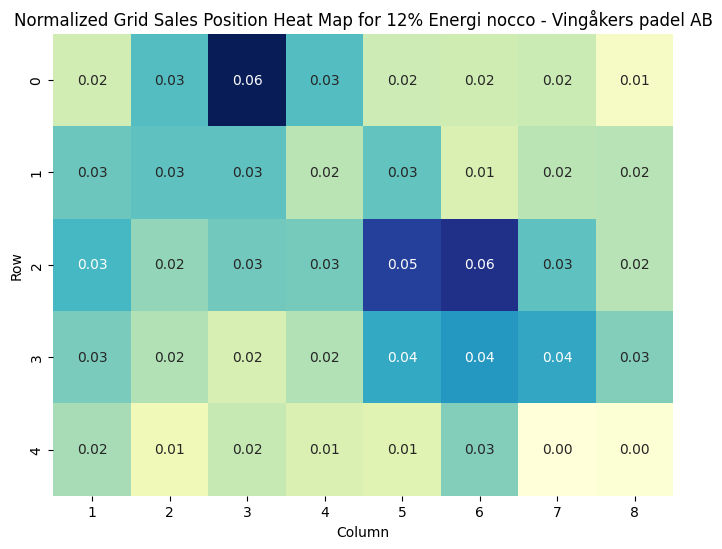

In [6]:
# Count rows and columns
sales_data['Row'] = sales_data['Position'] // 10
sales_data['Column'] = sales_data['Position'] % 10

# Grouping by 'Machine Name', 'Row', and 'Column' and calculating counts
df_grouped = sales_data.groupby(['Machine Name', 'Row', 'Column']).size().reset_index(name='Counts')

# Calculating total sales per machine
total_sales = df_grouped.groupby('Machine Name')['Counts'].sum().reset_index(name='Total Sales')

# Choosing to look at just one specific machine
top_selling_machine_name = "12% Energi nocco - Vingåkers padel AB"

# Filtering data for this specific machine only
df_top_machine = df_grouped[df_grouped['Machine Name'] == top_selling_machine_name]

# Merging total sales with the grouped DataFrame for this specific machine
df_top_machine = pd.merge(df_top_machine, total_sales, on='Machine Name')

# Normalizing sales counts for the top-selling machine
df_top_machine['Normalized Counts'] = df_top_machine['Counts'] / df_top_machine['Total Sales']

# Creating a pivot table for normalized counts for the top-selling machine
pivot_grid = df_top_machine.pivot(index='Row', columns='Column', values='Normalized Counts')
pivot_grid = pivot_grid.fillna(0)  # Filling missing values with 0

# Plotting the heat map for the top-selling machine
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_grid, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title(f"Normalized Grid Sales Position Heat Map for {top_selling_machine_name}")
plt.xlabel("Column")
plt.ylabel("Row")

# Display the plot
plt.show()



# Plats för er egna kod

Hello, World!
                              Product  Price  Position  \
8                Vitamin Well Defence   28.0        26   
9                 Vitamin Well Reload   28.0        27   
33   Barebells Bar Vegan Salty Peanut   25.0         7   
162               Vitamin Well Reload   25.0        32   
369              Vitamin Well Hydrate   25.0        24   

                                 Machine Name  Machine ID  \
8    Energi - Sandberg Gym&Fitness Falkenberg     6500683   
9    Energi - Sandberg Gym&Fitness Falkenberg     6500683   
33                   Energi Nocco - Jejes gym   611604666   
162                  Energi Nocco - Jejes gym   611604666   
369                  Energi Nocco - Jejes gym   611604666   

             Customer ID  Day  Month  Year  Hour  Minute   Weekday Category  \
8     660381091976062912    1      1  2022     9       9  Saturday    Dryck   
9     660381091976062912    1      1  2022     9       9  Saturday    Dryck   
33   1264823487320087993    1    

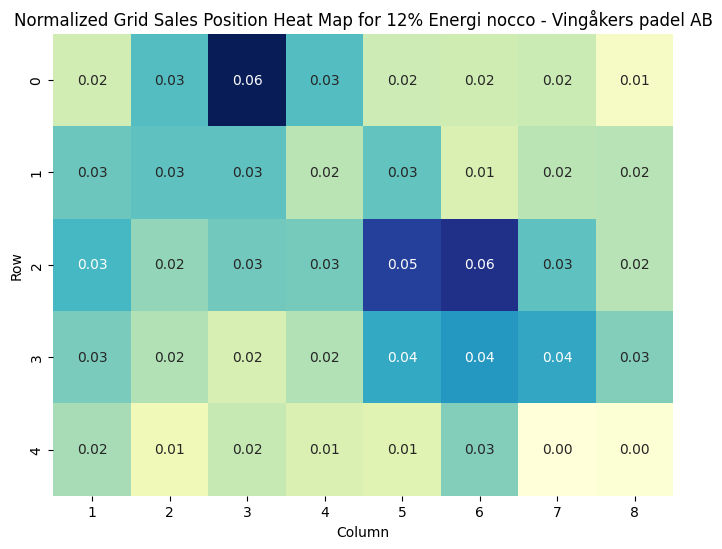

In [7]:
#Produkter
vitamin_well = sales_data[sales_data.Product.str.contains("vitamin well", case=False, na=False)]
powerade = sales_data[sales_data.Product.str.contains("powerade", case=False, na=False)]

sales_data['Row'] = sales_data['Position'] // 10
sales_data['Column'] = sales_data['Position'] % 10

## Group by machine group == Gym
# Summera försäljningen per placering och år
#sales_per_location_year = sales_data.groupby(['Machine Group', 'Year'])['Price'].sum().reset_index()

### Hur mycket av vitaminwell
#grouped_vitamin = sales_data.groupby([vitamin_well, 'Row', 'Column']).size().reset_index(name='Counts')
### Hur mycket av vitaminwell
#grouped_power = sales_data.groupby([powerade, 'Row', 'Column']).size().reset_index(name='Counts')

df_gym = sales_data[sales_data['Machine Name'].str.contains("GYM", case=False, na=False)]

print(df_gym.head())
# Count rows and columns
vitamin = df_gym[df_gym.Product.str.contains("Vitamin well", case=False, na=False)]
powerA = df_gym[df_gym.Product.str.contains("Powerade", case=False, na=False)]



# Grouping by 'Machine Name', 'Row', and 'Column' and calculating counts
#df_grouped = sales_data.groupby(['Machine Name', 'Row', 'Column']).size().reset_index(name='Counts')

# Calculating total sales per machine
#total_sales = df_grouped.groupby('Machine Name')['Counts'].sum().reset_index(name='Total Sales')

# Choosing to look at just one specific machine
#top_selling_machine_name = "12% Energi nocco - Vingåkers padel AB"

# Filtering data for this specific machine only
df_top_machine = df_grouped[df_grouped['Machine Name'] == top_selling_machine_name]

# Merging total sales with the grouped DataFrame for this specific machine
df_top_machine = pd.merge(df_top_machine, total_sales, on='Machine Name')

# Normalizing sales counts for the top-selling machine
df_top_machine['Normalized Counts'] = df_top_machine['Counts'] / df_top_machine['Total Sales']

# Creating a pivot table for normalized counts for the top-selling machine
pivot_grid = df_top_machine.pivot(index='Row', columns='Column', values='Normalized Counts')
pivot_grid = pivot_grid.fillna(0)  # Filling missing values with 0



# Plotting the heat map for the top-selling machine
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_grid, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title(f"Normalized Grid Sales Position Heat Map for {top_selling_machine_name}")
plt.xlabel("Column")
plt.ylabel("Row")

# Display the plot
plt.show()
